# Comprehensive Analysis of Sports Betting Transactions for Strategic Insights and Predictive Modeling

## Introduction:
This report presents a detailed analysis of transactional data from a sports betting platform. The dataset contains information on bets placed by players across various matches and websites, including details such as bet amounts, outcomes, betting odds, and the currency used.  

The primary objectives of this analysis are to:

1. Calculate the total player stake in Singapore Dollars (SGD).
2. Derive insights from the data that can inform strategic decision-making.
3. Predict the actual stake for the English Premier League in different currencies for the upcoming week.
4. Identify key metrics that could be optimized to enhance the player's actual stake amount.

In [372]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [373]:
def read_data(filename):
    """
    Reads a tab-separated values (TSV) file using UTF-16 encoding and returns a DataFrame.

    Parameters:
    filename (str): The path to the file to be read.

    Returns:
    DataFrame: A pandas DataFrame containing the data from the file.
    """
    data = pd.read_csv(filename, sep='\t', encoding='utf-16')
    return data


# Read data from 'data.csv' file and store it in a DataFrame
data = read_data(filename="data.csv")
data.head()  # Display the first few rows of the DataFrame

,Transaction Id,Odds,Status,Winlost,LiveIndicator,Betteam,Winlostdate,ActualRate,MatchId,Bettype,Actual_Stake,Currency,LeagueId,Transaction Date,WebSite Id,MaxBet
0,4006708,-1.07,WON,78.50,0,h,22/2/2023,0.08,4839773,1,53.50,IDR,13,22:52.3,1,"1,000.00"
1,4006712,6.60,LOSE,0.00,1,1,22/2/2023,0.08,4839766,5,10.00,IDR,13,37:23.1,1,"1,000.00"
2,4006713,4.80,LOSE,0.00,1,2,22/2/2023,0.08,4839766,5,10.00,IDR,13,37:41.6,1,"1,000.00"
3,4006714,-1.13,WON,53.25,1,h,22/2/2023,0.08,4839773,1,28.25,IDR,13,39:20.3,1,"1,000.00"
4,4006764,1.05,LOSE,0.00,0,a,24/2/2023,0.08,5114259,1,35.00,IDR,5,59:20.1,1,"1,000.00"


## Assignment

### 1. Find the total Player's stake in SGD
To address the first task, we focused on calculating the total "Player's Stake" in SGD, which represents the total amount wagered by players, converted into Singapore Dollars. We utilized the `Actual_Stake` column, which reflects the amount staked in the local currency for each transaction, and the `ActualRate` column, which provides the exchange rate of that local currency to SGD.

First, we checked for any missing values in the key columns (`Actual_Stake` and `ActualRate`), as any incomplete data could skew the final result. Next, we converted each bet to SGD by multiplying the `Actual_Stake` by the `ActualRate`, and then summed these converted values to arrive at the total.

In [374]:
# Step 1: Data Quality Check
# Verifying if there are any missing values in the key columns
missing_values = data[['Actual_Stake', 'ActualRate']].isnull().sum()
print(f"Missing values in 'Actual_Stake': {missing_values['Actual_Stake']}")
print(f"Missing values in 'ActualRate': {missing_values['ActualRate']}")

# Step 2: Convert Player's Stake to SGD
# Calculating the total Player's Stake in SGD
data['Stake_in_SGD'] = data['Actual_Stake'] * data['ActualRate']

# Step 3: Summing the total Player's Stake in SGD
total_stake_sgd = data['Stake_in_SGD'].sum()
print(f"Total Player's Stake in SGD: {total_stake_sgd:.2f}")

# Step 4: Summary and Explanation
# Displaying the first few rows to verify the calculation
data[['Transaction Id', 'Actual_Stake', 'ActualRate', 'Stake_in_SGD']].head()

Missing values in 'Actual_Stake': 0
Missing values in 'ActualRate': 0
Total Player's Stake in SGD: 24727388.74


,Transaction Id,Actual_Stake,ActualRate,Stake_in_SGD
0,4006708,53.50,0.08,4.39
1,4006712,10.00,0.08,0.82
2,4006713,10.00,0.08,0.82
3,4006714,28.25,0.08,2.32
4,4006764,35.00,0.08,2.87


### 2. Insights  
#### 1. High proportion of losses in Live Bets
**Observation**: There is a notable pattern suggesting that the proportion of losses in live bets might be lower compared to non-live bets. This raises an important question: ***Do players actually lose more frequently in non-live bets compared to live bets?***  

**Implication:** If this observation is correct, it could imply that players are potentially more successful in real-time bets due to the dynamic nature of live events. For the business, confirming this insight could reveal whether live betting is less risky for players and potentially more profitable. It might also suggest that players benefit from the immediate feedback and rapid decision-making in live betting scenarios.

To address this question, we will analyze the data to compare the proportions of losses between live and non-live bets. This analysis will help us determine if there is a significant difference in loss rates and provide a clearer understanding of how betting strategies and success rates differ between these two types of bets.

                  sum   count  Loss Proportion
LiveIndicator                                 
0               84750  159021             0.53
1              164920  350070             0.47


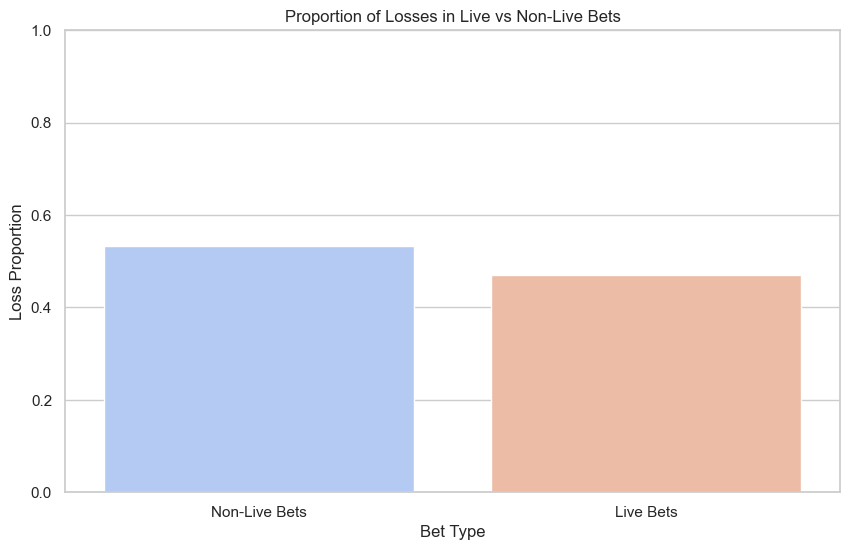

In [375]:
# Step 1: Define functions to calculate losses and proportions
def calculate_loss_proportions(data):
    """
    This function calculates the proportion of losses for live and non-live bets.

    Parameters:
    - data: DataFrame containing the betting data.
    
    Returns:
    - A DataFrame with the count and proportion of losses for live and non-live bets.
    """
    # Create a boolean column for losses (1 if lost, 0 if won)
    data['Loss'] = data['Status'].apply(lambda x: 1 if x == 'LOSE' else 0)

    # Group by LiveIndicator to calculate loss proportions
    loss_proportions = data.groupby('LiveIndicator')[
        'Loss'].agg(['sum', 'count'])
    loss_proportions['Loss Proportion'] = loss_proportions['sum'] / \
        loss_proportions['count']

    return loss_proportions


# Step 2: Apply the function to calculate loss proportions
loss_proportions = calculate_loss_proportions(data)
print(loss_proportions)

# Step 3: Visualization of loss proportions
def plot_loss_proportions(loss_proportions):
    """
    This function creates a bar plot showing the loss proportions for live and non-live bets.
    
    Parameters:
    - loss_proportions: DataFrame containing loss proportions for live and non-live bets.
    """
    # Define the labels for live and non-live bets
    labels = ['Non-Live Bets', 'Live Bets']

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=loss_proportions.index, y='Loss Proportion',
                data=loss_proportions, palette='coolwarm',hue=loss_proportions.index, legend=False)
    plt.xticks(ticks=[0, 1], labels=labels)
    plt.title('Proportion of Losses in Live vs Non-Live Bets')
    plt.ylabel('Loss Proportion')
    plt.xlabel('Bet Type')
    plt.ylim(0, 1)
    plt.show()


# Step 4: Plot the loss proportions
plot_loss_proportions(loss_proportions)

The data reveals that bets placed before the event starts (Non-Live Bets) have a higher loss proportion (53.29%) compared to bets made during the event (Live Bets), which have a lower loss proportion (47.11%).

This result suggests that players tend to be somewhat more effective in their live bets than in their non-live bets, indicating they might be making more informed decisions or responding better to real-time dynamics during the event.

Given that live bets are more profitable for players, the business could consider optimizing and promoting these types of bets to sustain or even increase player interest. At the same time, offering tools or incentives to improve outcomes in non-live bets could further enhance player engagement and overall betting success.

#### 2. Impact of Betting Odds on Outcomes:
**Observation:** There is a notable pattern suggesting that higher odds are associated with a higher likelihood of losing a bet. This raises an important question: ***Do bets with higher odds result in more frequent losses compared to bets with lower odds?***  

**Implication:** If this pattern is confirmed, it would indicate that while bets with higher odds offer the potential for larger payouts, they also carry a significantly higher risk of loss. Understanding this relationship could help players better manage their risk and make more informed betting decisions. For the business, this insight could be used to develop educational content or betting tools designed to help players navigate the risks associated with high-odds bets and enhance their overall betting strategy.

             Loss Proportion   count
Odds_Binned                         
< -2                    0.17   24276
-2 to -1.5              0.26   13338
-1.5 to -1              0.44   97999
-1 to -0.5              0.51   51582
-0.5 to 0               0.74    4505
0 to 0.5                0.15    3055
0.5 to 1                0.42  110941
1 to 1.5                0.50  113569
1.5 to 2                0.58   23582
> 2                     0.77   66244


C:\Users\david\AppData\Local\Temp\ipykernel_13064\1947743512.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  odds_impact = data.groupby('Odds_Binned')['Loss'].agg(['mean', 'count'])


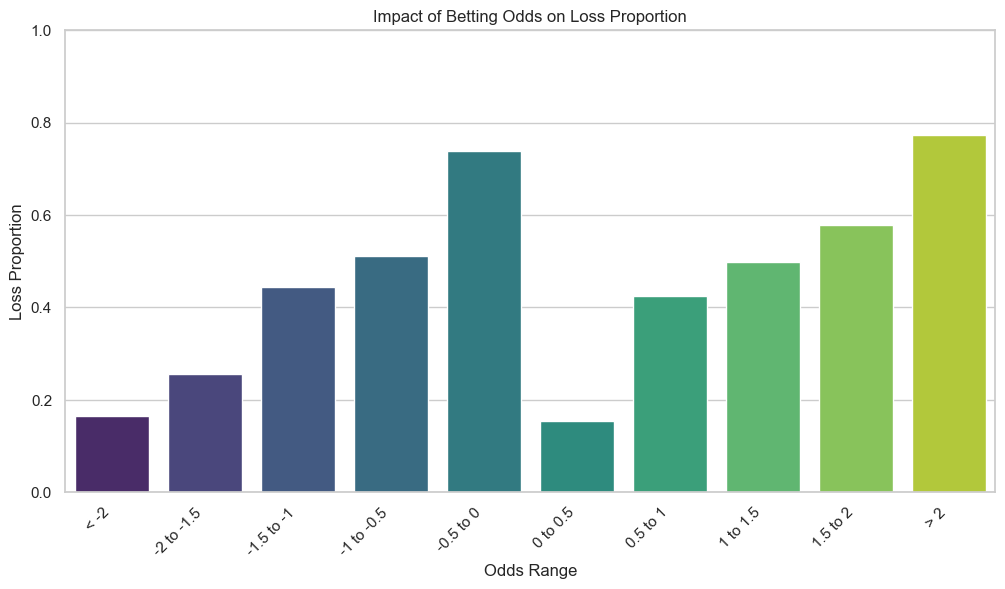

In [378]:
# Step 1: Define functions to analyze the impact of odds on outcomes
def analyze_odds_impact(data):
    """
    This function analyzes the impact of betting odds on the likelihood of losing a bet.
    
    Parameters:
    - data: DataFrame containing the betting data.
    
    Returns:
    - A DataFrame with the mean odds and loss proportion grouped by bins of odds.
    """
    # Create a new column for losses (1 if lost, 0 if won)
    data['Loss'] = data['Status'].apply(lambda x: 1 if x == 'LOSE' else 0)

    # Define bins for the odds
    bins = [-float('inf'), -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, float('inf')]
    labels = ['< -2', '-2 to -1.5', '-1.5 to -1', '-1 to -0.5',
              '-0.5 to 0', '0 to 0.5', '0.5 to 1', '1 to 1.5', '1.5 to 2', '> 2']

    # Bin the odds and calculate the proportion of losses
    data['Odds_Binned'] = pd.cut(data['Odds'], bins=bins, labels=labels)
    odds_impact = data.groupby('Odds_Binned')['Loss'].agg(['mean', 'count'])
    odds_impact.rename(columns={'mean': 'Loss Proportion'}, inplace=True)

    return odds_impact


# Step 2: Apply the function to analyze the impact of odds
odds_impact = analyze_odds_impact(data)
print(odds_impact)

# Step 3: Visualization of the impact of odds on loss proportion
def plot_odds_impact(odds_impact):
    """
    This function creates a bar plot showing the loss proportion for different bins of odds.
    
    Parameters:
    - odds_impact: DataFrame containing the impact of odds on loss proportion.
    """
    # Create the bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=odds_impact.index, y='Loss Proportion',
                data=odds_impact, palette='viridis',hue='Odds_Binned', legend=False)
    plt.title('Impact of Betting Odds on Loss Proportion')
    plt.ylabel('Loss Proportion')
    plt.xlabel('Odds Range')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.show()


# Step 4: Plot the impact of odds
plot_odds_impact(odds_impact)

**Low Odds Ranges:**  
Odds < -2: Loss proportion of 16.50%  
Odds -2 to -1.5: Loss proportion of 25.67%  
Odds -1.5 to -1: Loss proportion of 44.39%   
Bets with very low odds (more negative) tend to have a lower proportion of losses compared to those with less negative or positive odds. This suggests that lower odds, which generally indicate a higher probability of winning, are associated with fewer losses.

**Moderate Odds Ranges:**  
Odds -1 to -0.5: Loss proportion of 51.17%  
Odds -0.5 to 0: Loss proportion of 73.87%  
Odds 0 to 0.5: Loss proportion of 15.45%  
As the odds move closer to zero, the proportion of losses increases significantly, with the highest loss proportion observed in the range of 0 to 0.5. This indicates that higher odds (closer to zero) result in more frequent losses.

**High Odds Ranges:**  
Odds 0.5 to 1: Loss proportion of 42.43%  
Odds 1 to 1.5: Loss proportion of 49.90%  
Odds 1.5 to 2: Loss proportion of 57.90%  
Odds > 2: Loss proportion of 77.21%  
Higher odds, particularly those greater than 2, have the highest loss proportions. This confirms the initial hypothesis that while high odds offer larger potential payouts, they also come with a significantly higher risk, resulting in more frequent losses.  

Players should be aware that betting on higher odds increases their risk of losses. This insight can help players better manage their betting strategies, potentially leading to more informed and cautious decision-making. For the business, this information could be valuable for developing educational content or betting tools aimed at helping players understand the risks associated with high-odds bets. Providing guidance on how to balance risk and reward could enhance player satisfaction and engagement.

#### 3. Consistent currency use and its implications:
**Observation:** The majority of transactions are conducted in IDR (Indonesian Rupiah), with consistent exchange rates applied throughout the dataset.  
**Implication:** This consistency simplifies financial tracking and analysis for the business. However, it also suggests a potential market concentration in Indonesia. The business might explore opportunities to diversify its player base or enhance its offerings in other currencies to reduce reliance on a single market.

  Currency  total_transactions  total_stake
0      CNY                4168   673,002.69
1      IDR              298956 7,219,486.39
2      KRW                3406 1,930,518.28
3      MYR               15228 2,633,034.60
4   Others                6910   607,355.00
5      THB              147696 6,936,195.68
6      USD                3993   796,550.36
7      VND               28734 3,931,245.75


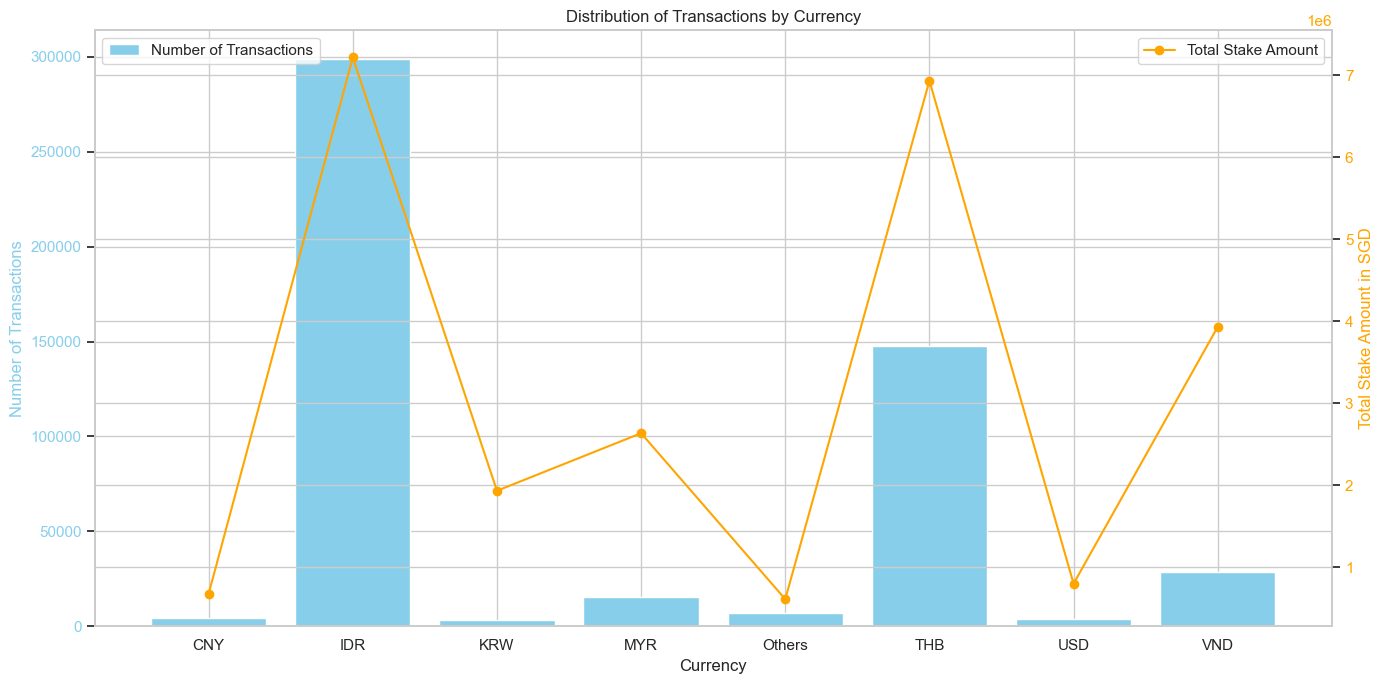

In [348]:
# Step 1: Define functions to analyze currency use and exchange rate consistency
def analyze_currency_use(data):
    """
    This function analyzes the distribution of transactions by currency and checks exchange rate consistency.
    
    Parameters:
    - data: DataFrame containing the betting data.
    
    Returns:
    - A DataFrame with the total number of transactions and the total stake amount for each currency.
    """
    # Calculate total number of transactions and total stake amount per currency
    currency_summary = data.groupby('Currency').agg(
        total_transactions=('Transaction Id', 'count'),
        total_stake=('Stake_in_SGD', 'sum')
    ).reset_index()

    return currency_summary


# Step 2: Apply functions to analyze currency use and exchange rate consistency
currency_summary = analyze_currency_use(data)
print(currency_summary)

# Step 3: Visualization of currency distribution

def plot_currency_distribution(currency_summary):
    """
    This function creates a bar plot showing the distribution of transactions and total stake amount by currency.
    
    Parameters:
    - currency_summary: DataFrame containing summary of transactions and stake amount by currency.
    """
    # Create a figure with two subplots
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Plot the number of transactions by currency
    ax1.bar(currency_summary['Currency'], currency_summary['total_transactions'],
            color='skyblue', label='Number of Transactions')
    ax1.set_xlabel('Currency')
    ax1.set_ylabel('Number of Transactions', color='skyblue')
    ax1.tick_params(axis='y', labelcolor='skyblue')
    ax1.set_title('Distribution of Transactions by Currency')

    # Create a second y-axis for total stake amount
    ax2 = ax1.twinx()
    ax2.plot(currency_summary['Currency'], currency_summary['total_stake'],
             color='orange', marker='o', label='Total Stake Amount')
    ax2.set_ylabel('Total Stake Amount in SGD', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    # Add legends
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    fig.tight_layout()
    plt.show()


# Step 4: Plot the distribution of transactions by currency
plot_currency_distribution(currency_summary)

The majority of transactions are conducted in **IDR (Indonesian Rupiah)**, with a total of 298,956 transactions. This indicates a high concentration of betting activity in Indonesia.
Other significant currencies include **THB (Thai Baht)** and **VND (Vietnamese Dong)**  with substantial total stakes and transaction counts. However, these figures are still lower compared to IDR.  

The heavy reliance on IDR suggests that the business has a significant market presence in Indonesia. While this is beneficial for focusing efforts in a key market, it also poses risks if there are market fluctuations or changes in regulations in Indonesia. However, given the presence of various other currencies, there is an opportunity for the business to explore further market diversification. Enhancing offerings or creating incentives for players using other currencies could reduce reliance on the Indonesian market and potentially capture new customer segments.


#### 4. Players favor specific Bet Types:  
**Observation:** Certain bet types are far more popular among players, with some bet types being rarely chosen. This trend could be tied to player preferences or the perceived risk and reward associated with different bet types.  
**Implication:** Understanding player preferences allows the business to tailor its offerings, possibly promoting less popular bet types through targeted marketing or offering special incentives. Additionally, this could guide the development of new bet types that align with player interests.

    Bettype   total_stake  transaction_count
0         1 14,262,623.11             228096
1         2     26,403.31                548
2         3  6,417,454.80             117489
3         4    130,578.56              18441
4         5    424,954.73              28792
5         6     12,528.86               1500
6         7  1,260,678.01              35651
7         8     90,489.16              11080
8         9  2,053,499.92              60698
9        10      3,560.01                715
10       13      2,688.72                 36
11       14     16,609.63               4159
12       15      2,294.86                134
13       16     20,542.67               1579
14       17      2,482.39                173


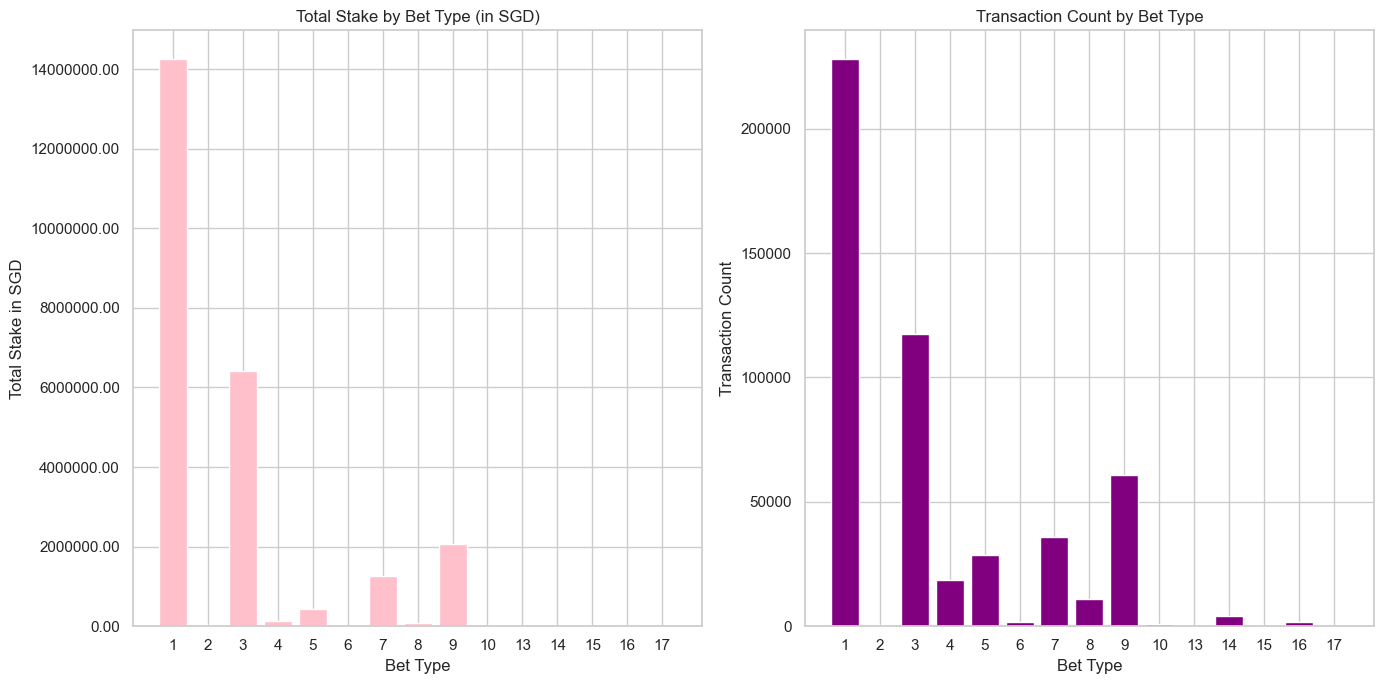

In [349]:
def analyze_bet_types(data):
    """
    Analyzes the popularity and total stake of each bet type.

    This function groups the betting data by the type of bet and calculates:
    - The total stake (in SGD) for each bet type.
    - The count of transactions for each bet type.

    Parameters:
    - data: DataFrame containing the betting data with 'Bettype' and 'Stake_in_SGD' columns.

    Returns:
    - A DataFrame with the following columns:
        - 'Bettype': The type of bet.
        - 'total_stake': The sum of stakes for each bet type (in SGD).
        - 'transaction_count': The count of transactions for each bet type.
    """
    # Group by 'Bettype' and aggregate the total stake and transaction count
    bet_type_summary = data.groupby('Bettype').agg(
        # Sum of all stakes in SGD for each bet type
        total_stake=('Stake_in_SGD', 'sum'),
        # Count of transactions for each bet type
        transaction_count=('Transaction Id', 'count')
        # Reset index to turn the groupby object back into a DataFrame
    ).reset_index()

    return bet_type_summary


def plot_bet_type_distribution(bet_type_summary):
    """
    Creates a bar plot showing the distribution of total stake and transaction count for each bet type.

    This function generates two side-by-side bar plots:
    - The first plot displays the total stake for each bet type.
    - The second plot displays the transaction count for each bet type.

    Parameters:
    - bet_type_summary: DataFrame containing total stake and transaction count by bet type.
    """
    # Convert 'Bettype' to a string type for better visualization
    bet_type_summary['Bettype'] = bet_type_summary['Bettype'].astype(str)

    # Create a figure with two subplots
    plt.figure(figsize=(14, 7))

    # Subplot for total stake
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
    plt.bar(bet_type_summary['Bettype'],
            bet_type_summary['total_stake'], color='pink')
    plt.xlabel('Bet Type')  # X-axis label
    plt.ylabel('Total Stake in SGD')  # Y-axis label
    plt.title('Total Stake by Bet Type (in SGD)')  # Title of the plot
    # Format y-axis labels to 2 decimal places
    plt.gca().yaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, _: f'{x:.2f}'))

    # Subplot for transaction count
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
    plt.bar(bet_type_summary['Bettype'],
            bet_type_summary['transaction_count'], color='purple')
    plt.xlabel('Bet Type')  # X-axis label
    plt.ylabel('Transaction Count')  # Y-axis label
    plt.title('Transaction Count by Bet Type')  # Title of the plot

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the plots


# Analyze the bet types
bet_type_summary = analyze_bet_types(data)
print(bet_type_summary)  # Print the summary DataFrame to the console

# Plot the distribution of total stake and transaction count by bet type
plot_bet_type_distribution(bet_type_summary)

**Bet Type 1:**  
Total Stake: 14,262,620 SGD  
Transaction Count: 228,096  
Conclusion: This bet type is the most popular, both in terms of total stake and number of transactions. This indicates that players prefer this bet type and use it frequently.  

**Bet Types 2 and 3:**  
Total Stake: 26,403 SGD and 6,417,455 SGD respectively  
Transaction Count: 548 and 117,489 respectively  
Conclusion: Although less popular than Bet Type 1, these bet types still have significant stakes and transaction counts. Bet Type 3 has a notable stake and is relatively popular.

**Bet Types 4 to 17:**  
Total Stake: Ranges from 130,578.60 SGD for Bet Type 4 to 2,482.39 SGD for Bet Type 17.  
Transaction Count: Ranges from 18,441 for Bet Type 4 to 173 for Bet Type 17.  
Conclusion: Less popular bet types have lower stakes and transaction counts, with some types being almost unused.

Players have a clear preference for Bet Type 1, as evidenced by the high total stake and transaction count. This may reflect a favorable perception of the rewards or greater familiarity with this bet type. Bet types with less stake and fewer transactions (such as Bet Types 13 and 17) suggest these are less attractive to players, potentially due to perceived risk, the types of events they apply to, or a lack of understanding. To balance popularity, the business might implement targeted marketing strategies for less popular bet types, such as promotions, incentives, or enhancements to these types.

#### 5. Peak Betting Hours   
**Observation:** The distribution of bets across different times of the day reveals specific hours when betting activity peaks. By analyzing the TransDate column, which captures the time of day when bets are placed, we can identify the hours with the highest betting volumes.  

**Implication:** Understanding peak betting hours allows the business to optimize operations, such as staffing, system performance, and marketing efforts. By targeting promotions or special offers during these peak times, the business can capitalize on higher betting activity. Additionally, insights gained from these peak periods can inform strategies to increase engagement during off-peak hours, potentially leading to a more balanced betting activity throughout the day.


#### During-Match

In [ ]:
data_filtered_onTime = data[data['LiveIndicator'] == 1]

# Convert 'Transaction Date' to datetime and extract minutes
data_filtered_onTime['Transaction Date'] = pd.to_datetime(data_filtered_onTime['Transaction Date'], format='%M:%S.%f').dt.minute

# Define bins and labels for grouping times
bins = [0, 10, 20, 30, 40, 50, 60]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60']

# Create a new column with time bins
pd.options.display.float_format = '{:,.2f}'.format
data_filtered_onTime['Time Bin'] = pd.cut(data_filtered_onTime['Transaction Date'], bins=bins, labels=labels, right=False)

# Aggregate data to find the count and sum of stakes in each time bin
bet_activity_summaryOnTime  = data_filtered_onTime.groupby('Time Bin', observed=False)['Stake_in_SGD'].agg(
    Total_Bets='count', 
    Total_Stake_in_SGD='sum'
).reset_index()

**Observation:** The analysis of the `Transaction Date` column, which records the time when bets are placed, reveals a distinct pattern in betting activity across different times of the day. By aggregating the data into 10-minute intervals, we identified specific hours with elevated betting volumes.

**Results:**

| Time Bin | Total_Bets  | Total_Stake_in_SGD       |
|----------|--------|------------------|
| 0-10     | 65885  | 2,473,227.89     |
| 10-20    | 57224  | 2,003,775.71     |
| 20-30    | 49707 | 1,767,687.44     |
| 30-40    | 68164 | 2,589,563.11     |
| 40-50    | 56070 | 2,052,151.31     |
| 50-60    | 53020 | 1,954,460.38     |

The table above summarizes the distribution of betting activity across different 10-minute intervals. The highest betting volume is observed during the 0-10 minute and 30-40 minute bins, highlighting these as optimal periods for focused marketing and operational adjustments.


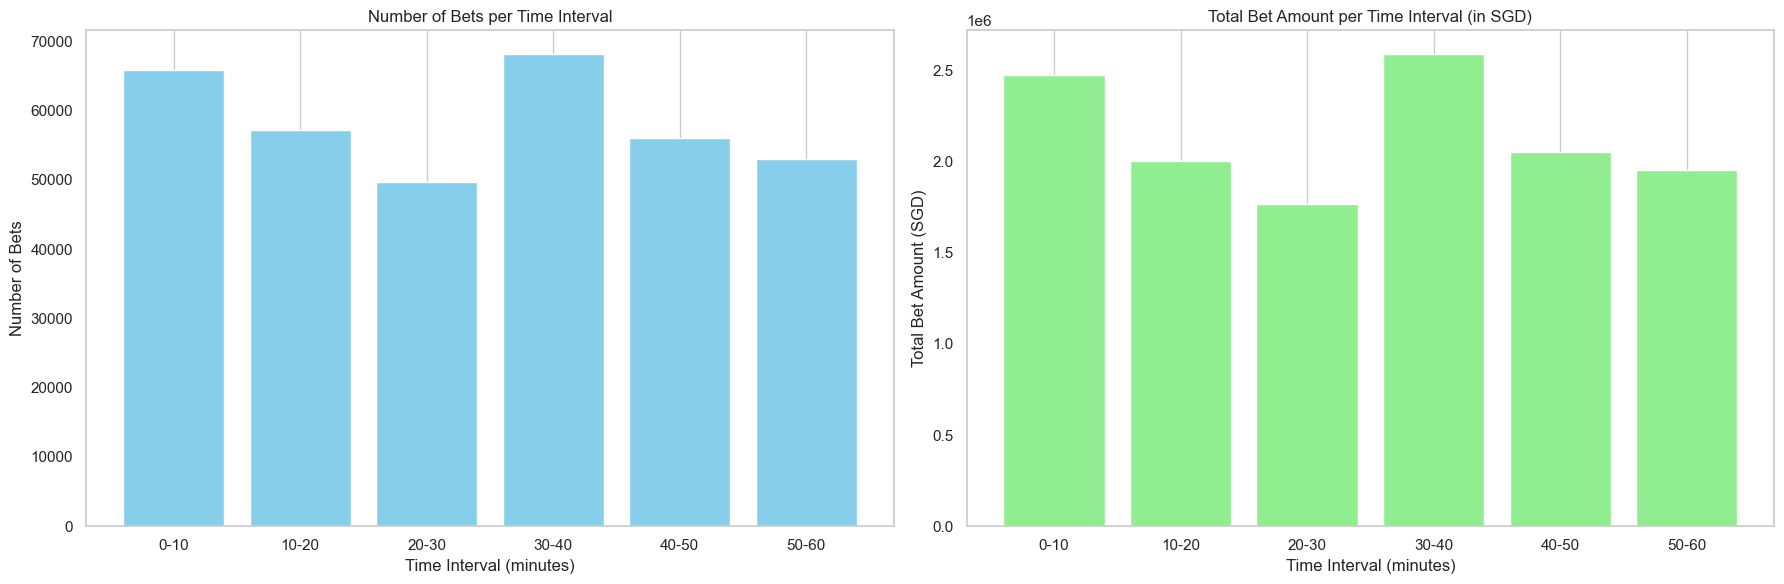

In [351]:
# Function to plot count of bets
def plot_bet_count(ax, df):
    ax.bar(df['Time Bin'], df['Total_Bets'], color='skyblue')
    ax.set_title('Number of Bets per Time Interval')
    ax.set_xlabel('Time Interval (minutes)')
    ax.set_ylabel('Number of Bets')
    ax.grid(axis='y')

# Function to plot total bet amount
def plot_bet_sum(ax, df):
    ax.bar(df['Time Bin'], df['Total_Stake_in_SGD'], color='lightgreen')
    ax.set_title('Total Bet Amount per Time Interval (in SGD)')
    ax.set_xlabel('Time Interval (minutes)')
    ax.set_ylabel('Total Bet Amount (SGD)')
    ax.grid(axis='y')

# Main function to create and display the plots
def main(df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    
    plot_bet_count(ax1, df)
    plot_bet_sum(ax2, df)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Call the main function with the result data
    main(bet_activity_summaryOnTime)

Identifying peak betting hours during the match provides valuable insights for optimizing operational strategies. The data reveals that betting activity is notably higher during the 0-10 minute and 30-40 minute intervals of the game, indicating these as the most active periods for in-play betting. This information is crucial for adjusting staffing levels, enhancing system performance, and targeting marketing efforts effectively. Additionally, strategies to boost engagement during less active periods can help achieve a more balanced distribution of betting activity throughout the day.

#### Pre-Match

In [ ]:
data_filtered_offTime = data[data['LiveIndicator'] == 0]

# Convert 'Transaction Date' to datetime and extract minutes
data_filtered_offTime['Transaction Date'] = pd.to_datetime(data_filtered_offTime['Transaction Date'], format='%M:%S.%f').dt.minute

# Define bins and labels for grouping times
bins = [0, 10, 20, 30, 40, 50, 60]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60']

# Create a new column with time bins
pd.options.display.float_format = '{:,.2f}'.format
data_filtered_offTime['Time Bin'] = pd.cut(data_filtered_offTime['Transaction Date'], bins=bins, labels=labels, right=False)

# Aggregate data to find the count and sum of stakes in each time bin
bet_activity_summaryOffTime  = data_filtered_offTime.groupby('Time Bin', observed=False)['Stake_in_SGD'].agg(
    Total_Bets='count', 
    Total_Stake_in_SGD='sum'
).reset_index()

**Results:**

| Time Bin | Total_Bets  | Total_Stake_in_SGD       |
|----------|--------|------------------|
| 0-10     | 25551  | 1,854,136.11     |
| 10-20    | 25894  | 1,990,272.05     |
| 20-30    | 29513 | 2,197,557.74     |
| 30-40    | 26005 | 2,053,116.15     |
| 40-50    | 23728 | 1,766,500.17     |
| 50-60    | 28330 | 2,024,940.68     |

The table above summarizes the distribution of betting activity across different 10-minute intervals. The highest betting volume is observed during the 20-30 minute and 50-60 minute bins, highlighting these as optimal periods for focused marketing and operational adjustments.

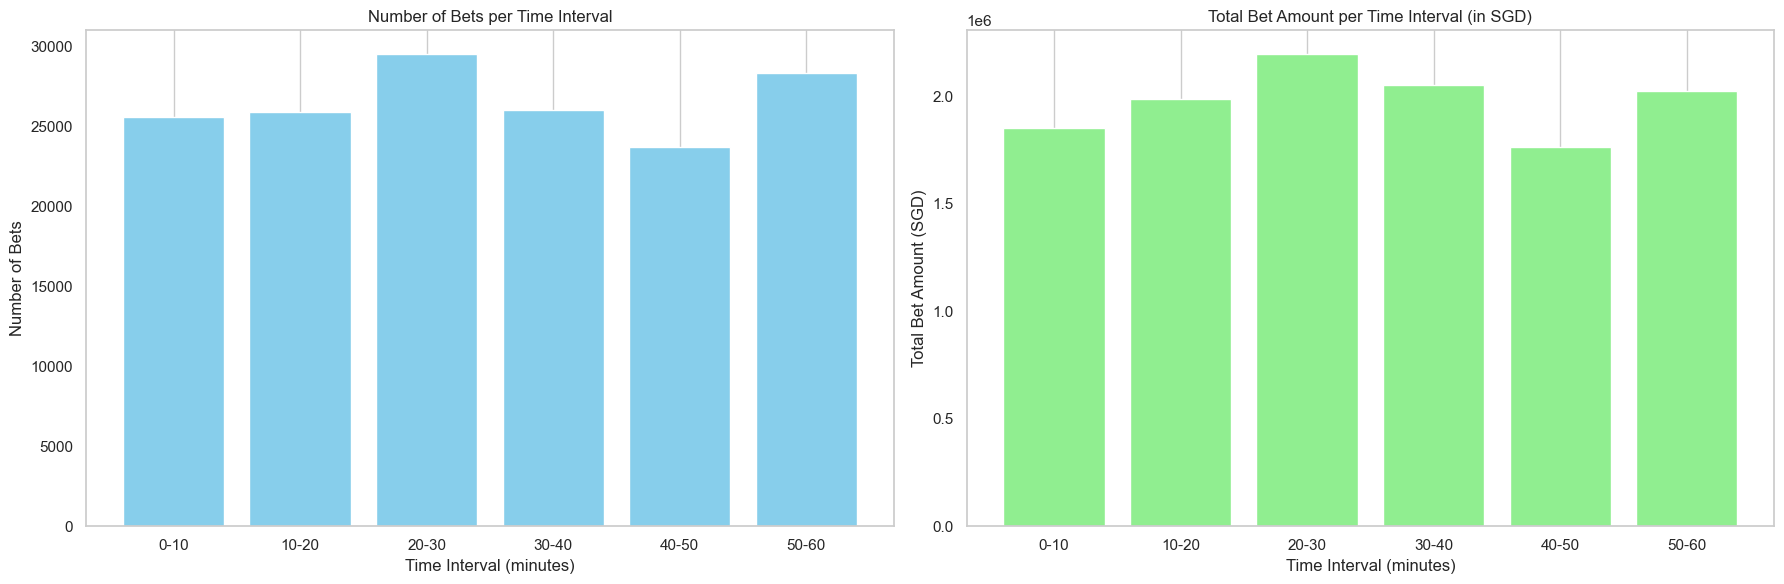

In [355]:
# Main function to create and display the plots
def main(df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    
    plot_bet_count(ax1, df)
    plot_bet_sum(ax2, df)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Call the main function with the result data
    main(bet_activity_summaryOffTime)

The data indicates that betting activity is significantly higher during the 20-30 minute and 50-60 minute intervals before the match, highlighting these periods as the most active times for pre-match betting. This information is essential for optimizing staffing levels, improving system performance, and strategically targeting marketing efforts. By aligning promotional activities with these peak pre-match periods, the business can enhance engagement and increase betting volume effectively.

### 3. Predict the Actual Stake of the English Premier League of each currency for the following week

#### Step 3.1: Analyze Unique Dates and Statuses  
**Objective:** The primary goal of this step is to understand the temporal range and the categorical diversity of the betting data. By analyzing the unique dates and statuses in the dataset, we gain insights into the period covered by the data and the different outcomes of the bets.

In [211]:
# Extract unique dates and statuses
unique_dates = data['Winlostdate'].sort_values().unique()
unique_statuses = data['Status'].unique() 
# Print results
print("Unique Dates:", unique_dates)
print("Unique Statuses:", unique_statuses)

Unique Dates: ['21/2/2023' '22/2/2023' '24/2/2023' '25/2/2023' '26/2/2023' '27/2/2023'
 '28/2/2023']
Unique Statuses: ['WON' 'LOSE' 'VOID' 'DRAW' 'D.L.Void' 'REFUND']


**Unique Dates:**  
The dataset includes betting transactions across the following dates

|21/2/2023	| 22/2/2023	| 24/2/2023	|  25/2/2023	|  26/2/2023   |  27/2/2023| 28/2/2023
|-----------|----------|----------|--------------|--------------|------------| ------------|
|Tuesday|     Wednesday   |Friday  |    Saturday    |  Sunday    |   Monday|  Tuesday| 

The dates are spread across a week, providing a diverse temporal range for analysis.

**Unique Statuses:**  
The dataset contains several statuses  

|WON | LOSE | DRAW | VOID | D.L.Void | REFUND |
|----|----|--------|------|----------|---------|  

For the purpose of this analysis, only the valid betting statuses are considered: WON, LOSE, and DRAW. Other statuses, such as VOID and D.L.Void, indicate invalid or rejected bets and are excluded to ensure the accuracy and relevance of the financial analysis.

In [212]:
VALID_BETS_DATA = data[data['Status'].isin(["WON", "LOSE", "DRAW"])]
# Set global display format for floating-point numbers in pandas DataFrames
# This format ensures that numbers are displayed with two decimal places and includes thousand separators (commas)
# It improves the readability of financial and statistical data
pd.options.display.float_format = '{:,.2f}'.format

#### Step 3.2: Analyze Stakes by Currency and Date  
**Objective:** In this step, we aim to analyze the betting stakes by currency and date. This will help us understand the distribution of stakes across different currencies and dates, facilitating deeper insights into betting patterns.

In [227]:
# Function to aggregate stakes by currency and date
def aggregate_stakes_by_currency(data):
    """
    Aggregates actual stakes by currency and date.
    
    Parameters:
    data (pd.DataFrame): DataFrame containing betting data with 'Currency', 'Winlostdate', and 'Actual_Stake' columns.

    Returns:
    pd.DataFrame: Aggregated DataFrame with stakes summed by currency and date.
    """
    # Sort data by 'Winlostdate' and group by 'Currency' and 'Winlostdate'
    grouped_data = data.sort_values(by='Winlostdate').groupby(['Currency', 'Winlostdate'])['Actual_Stake'].sum()
    
    # Convert the series to a DataFrame
    aggregated_data = pd.DataFrame(grouped_data.reset_index())
    
    return aggregated_data

# Function to pivot the aggregated data
def pivot_stakes_data(aggregated_data):
    """
    Converts aggregated data into a pivot table format for better analysis.
    
    Parameters:
    aggregated_data (pd.DataFrame): DataFrame containing aggregated stakes by currency and date.

    Returns:
    pd.DataFrame: Pivot table with currencies as rows and dates as columns.
    """
    # Pivot the DataFrame
    pivot_data = aggregated_data.pivot(index='Currency', columns='Winlostdate', values='Actual_Stake')
    
    return pivot_data

# Main function to execute the analysis
def main(data):
    aggregated_data = aggregate_stakes_by_currency(data) # Aggregate stakes by currency and date
    currency_date_stake_summary  = pivot_stakes_data(aggregated_data) # Pivot the aggregated data
    return currency_date_stake_summary  # Display the pivot table

# Execute the main function with the filtered valid bets data
currency_date_stake_summary = main(VALID_BETS_DATA)

In [228]:
currency_date_stake_summary

Winlostdate,21/2/2023,22/2/2023,24/2/2023,25/2/2023,26/2/2023,27/2/2023,28/2/2023
Currency,,,,,,,
CNY,"255,785.10","459,163.37","323,533.88","934,515.40","1,107,803.93","298,934.12","241,323.04"
IDR,"6,036,148.69","8,499,488.62","6,041,463.22","26,059,001.34","27,855,657.94","6,047,876.97","4,891,529.85"
KRW,"77,484,396.00","191,889,701.00","121,798,315.00","593,291,859.00","552,218,837.46","116,297,523.00","99,730,245.00"
MYR,"525,059.69","644,975.68","662,903.44","2,394,020.09","2,680,927.57","839,990.85","646,011.24"
Others,"27,436,962.04","55,022,414.98","133,460,799.75","745,500,134.69","524,805,791.71","435,002,878.95","481,716,806.30"
THB,"9,916,135.82","15,975,898.60","11,818,886.16","64,163,947.73","53,842,611.52","11,566,893.14","12,150,556.97"
USD,"39,120.15","93,521.79","59,175.14","196,127.67","125,696.27","64,390.24","41,742.31"
VND,"4,182,958.60","8,921,875.66","7,838,521.27","23,030,331.56","18,672,028.14","8,214,597.43","4,266,362.52"


### Step 3.3: Analyze Stakes by Currency, League, and Date  
**Objective:** In this step, we aim to analyze the betting stakes by currency, league, and date. This detailed analysis will help us predict the actual stakes for League 3 in the upcoming week by providing a comprehensive view of stake distributions across different currencies and leagues.

In [231]:
# Function to aggregate stakes by currency, league, and date
def aggregate_stakes_by_league(data):
    """
    Aggregates actual stakes by currency, league, and date.
    
    Parameters:
    data (pd.DataFrame): DataFrame containing betting data with 'Currency', 'LeagueId', 'Winlostdate', and 'Actual_Stake' columns.

    Returns:
    pd.DataFrame: Aggregated DataFrame with stakes summed by currency, league, and date.
    """
    # Sort data by 'Winlostdate' and group by 'Currency', 'LeagueId', and 'Winlostdate'
    grouped_data = data.sort_values(by='Winlostdate').groupby(['Currency', 'LeagueId', 'Winlostdate'])['Actual_Stake'].sum()
    
    # Convert the series to a DataFrame
    aggregated_data = pd.DataFrame(grouped_data.reset_index())
    
    return aggregated_data

# Function to pivot the aggregated data
def pivot_stakes_by_league(aggregated_data):
    """
    Converts aggregated data into a pivot table format for better analysis.
    
    Parameters:
    aggregated_data (pd.DataFrame): DataFrame containing aggregated stakes by currency, league, and date.

    Returns:
    pd.DataFrame: Pivot table with currencies as rows and dates and leagues as columns.
    """
    # Pivot the DataFrame
    pivot_data = aggregated_data.pivot_table(index='Currency', columns=['Winlostdate', 'LeagueId'], values='Actual_Stake')
    
    # Sort columns by date and league levels
    pivot_data = pivot_data.sort_index(axis=1, level=[0, 1])
    
    return pivot_data

# Main function to execute the analysis
def main(data):
    aggregated_data = aggregate_stakes_by_league(data) # Aggregate stakes by currency, league, and date
    league_stake_summary = pivot_stakes_by_league(aggregated_data) # Pivot the aggregated data
    return league_stake_summary

# Execute the main function with the filtered valid bets data
league_stake_summary = main(VALID_BETS_DATA)

In [234]:
league_stake_summary

Winlostdate     21/2/2023      22/2/2023     24/2/2023                \
LeagueId               13             13            3             5    
Currency                                                               
CNY            255,785.10     459,163.37    106,455.99     62,887.62   
IDR          6,036,148.69   8,499,488.62  2,269,806.56    998,766.74   
KRW         77,484,396.00 191,889,701.00 26,693,986.00 18,697,465.00   
MYR            525,059.69     644,975.68    233,627.16    142,155.37   
Others      27,436,962.04  55,022,414.98 12,269,981.68  5,500,274.06   
THB          9,916,135.82  15,975,898.60  4,120,265.77  2,181,266.58   
USD             39,120.15      93,521.79     14,671.34     18,219.03   
VND          4,182,958.60   8,921,875.66  3,006,084.31  2,620,531.95   

Winlostdate                                   25/2/2023                \
LeagueId                6             8              3             4    
Currency                                                                
CNY             126,915.77     27,274.50     301,032.22     66,736.62   
IDR           1,645,560.00  1,127,329.92  10,589,260.38  2,689,200.86   
KRW          55,057,611.00 21,349,253.00 250,421,362.00 41,010,516.00   
MYR             174,734.55    112,386.36     874,665.59    351,562.89   
Others      108,809,743.01  6,880,801.00 384,448,629.31  6,827,739.68   
THB           3,151,192.61  2,366,161.20  29,105,414.56  5,916,019.46   
USD              14,795.94     11,488.83      66,105.02     32,174.71   
VND           1,705,538.27    506,366.74   7,585,908.48  2,944,980.29   

Winlostdate                                                 26/2/2023  \
LeagueId                5              6             8             3    
Currency                                                                
CNY             302,598.18     235,400.40     28,747.98    149,554.00   
IDR           4,667,956.27   6,691,172.35  1,421,411.48  3,535,472.60   
KRW         107,429,143.00 126,535,976.00 67,894,862.00 65,331,656.00   
MYR             502,794.73     540,705.38    124,291.50    353,472.82   
Others      312,154,978.48  37,542,635.22  4,526,152.00 28,068,653.45   
THB          16,038,827.34  10,814,139.61  2,289,546.76  9,499,121.18   
USD              18,284.52      48,925.41     30,638.01     21,161.81   
VND           4,054,501.75   7,698,361.11    746,579.93  2,708,109.36   

Winlostdate                                                              \
LeagueId                4              5              6              8    
Currency                                                                  
CNY             334,068.52     118,574.45     281,150.08     224,456.88   
IDR           7,149,265.54   3,672,962.57   6,937,516.11   6,560,441.12   
KRW         163,126,981.00  68,079,305.00 132,130,539.00 123,550,356.46   
MYR             610,103.05     423,919.73     771,309.68     522,122.29   
Others      122,003,587.01 102,891,509.33 252,807,166.06  19,034,875.86   
THB          13,002,156.14   8,946,798.19  13,335,376.77   9,059,159.25   
USD              26,989.81      20,717.96      11,500.40      45,326.29   
VND           5,873,915.67   2,024,700.42   5,193,056.41   2,872,246.28   

Winlostdate      27/2/2023                     28/2/2023  
LeagueId                4              6              4   
Currency                                                  
CNY             208,621.12      90,313.00     241,323.04  
IDR           4,289,558.51   1,758,318.46   4,891,529.85  
KRW          74,729,688.00  41,567,835.00  99,730,245.00  
MYR             542,595.21     297,395.64     646,011.24  
Others      327,364,094.80 107,638,784.15 481,716,806.30  
THB           8,783,223.93   2,783,669.21  12,150,556.97  
USD              45,192.59      19,197.65      41,742.31  
VND           6,366,945.31   1,847,652.12   4,266,362.52

#### Step 3.4: Forecasting future stakes using Percentage Growth  
**Objective:** In this step, we aim to forecast the betting stakes for the upcoming week by leveraging the percentage growth observed from the historical data. The goal is to predict future stakes based on the trends identified in the previous week. The historical data covers the period from February 21, 2023, to February 27, 2023, which spans from Tuesday to Monday. The week concludes with a Tuesday, February 28, 2023. We will use this additional Tuesday as a reference to project the betting stakes for the upcoming week.  

|21/2/2023	| 22/2/2023	| 24/2/2023	|  25/2/2023	|  26/2/2023   |  27/2/2023| 
|-----------|----------|----------|--------------|--------------|------------| 
|Tuesday|     Wednesday   |Friday  |    Saturday    |  Sunday    |   Monday|       

Specifically, we will estimate the stakes for :  
March 1, 2023 (Wednesday),  
March 3, 2023 (Friday),  
March 4, 2023 (Saturday),  
March 5, 2023 (Sunday) and March 6, 2023 (Monday). 

|28/2/2023| 1/3/2023 | 3/3/2023 | 4/3/2023 | 5/3/2023  |  6/3/2023  |
|---------|---------|---------|---------| ---------| ---------|
|Tuesday|  Wednesday   |Friday  |    Saturday    |  Sunday    |   Monday|   



In [262]:
def forecast_future_stakes(number_of_days, historical_values, initial_value):
    """
    Forecasts future stake values based on percentage growth observed in historical data.

    Parameters:
    number_of_days (int): Number of future days to forecast.
    historical_values (np.ndarray): Array of historical stake values.
    initial_value (float): Stake value for the starting day of the forecast period.

    Returns:
    np.ndarray: Array of forecasted stake values for the next 'number_of_days' days.

    Example:
    If historical_values is an array [100, 150, 200, 250, 300, 350] and initial_value is 400,
    and number_of_days is 5, the function will calculate the forecasted stakes for the next 5 days
    based on the percentage growth observed from the historical values.
    
    Example usage:
    >>> historical_values = np.array([100, 150, 200, 250, 300, 350])
    >>> initial_value = 400
    >>> number_of_days = 5
    >>> forecast_future_stakes(number_of_days, historical_values, initial_value)
    array([ 400.        ,  480.        ,  576.        ,  691.2       ,  829.44     ])
    """
    forecasted_values = np.array([initial_value])
    
    # Calculate percentage growth for each day
    for i in range(1, number_of_days):
        final_value = historical_values[0][i]
        initial_value = historical_values[0][i - 1]
        percentage_growth = (final_value - initial_value) / initial_value
        
        # Forecast the next value based on the percentage growth
        next_value = forecasted_values[-1] * (1 + percentage_growth)
        forecasted_values = np.append(forecasted_values, next_value)
    
    return forecasted_values

##### Forecasting Next Week’s Stake Values by Currency

In [267]:
def forecast_stakes_for_week(processed_data_currency, unique_currencies, forecast_function):
    """
    Forecasts stake values for the upcoming week for each currency based on historical data.

    Parameters:
    processed_data_currency (pd.DataFrame): DataFrame containing historical stake data.
    unique_currencies (list): List of unique currencies to forecast.
    forecast_function (function): Function to forecast future stake values.

    Returns:
    pd.DataFrame: DataFrame containing forecasted stake values for each currency.
    """
    next_days_stakes = {}
    
    for currency in unique_currencies:
        processed_currency = processed_data_currency[processed_data_currency['Currency'] == currency]
        x = processed_currency[['21/2/2023', '22/2/2023', '24/2/2023', '25/2/2023', '26/2/2023', '27/2/2023']].to_numpy()
        y = processed_currency['28/2/2023'].to_numpy()
        next_days_stakes[currency] = forecast_function(6, x, y)
    
    # Define columns for the next week
    columns_next_stake_by_currency = ['28/2/2023', '1/3/2023', '3/3/2023', '4/3/2023', '5/3/2023', '6/3/2023']
    
    # Create a DataFrame from the forecasted data
    df_next_week_stakes = pd.DataFrame(next_days_stakes)
    df_next_week_stakes['Day'] = columns_next_stake_by_currency
    df_next_week_stakes = df_next_week_stakes.set_index('Day').T
    
    return df_next_week_stakes

In [269]:
# USAGE: forecast
processed_data_currency = currency_date_stake_summary.reset_index()
unique_currencies = processed_data_currency['Currency'].unique()
df_Total_Stake_By_Currency_Next_week = forecast_stakes_for_week(processed_data_currency, unique_currencies, forecast_future_stakes)

In [270]:
df_Total_Stake_By_Currency_Next_week

Day,28/2/2023,1/3/2023,3/3/2023,4/3/2023,5/3/2023,6/3/2023
CNY,"241,323.04","433,202.33","305,241.31","881,678.01","1,045,168.82","282,032.42"
IDR,"4,891,529.85","6,887,753.17","4,895,836.60","21,117,502.15","22,573,463.53","4,901,034.13"
KRW,"99,730,245.00","246,981,429.57","156,766,735.27","763,626,555.91","710,761,428.06","149,686,660.29"
MYR,"646,011.24","793,550.80","815,608.36","2,945,501.09","3,298,499.92","1,033,489.22"
Others,"481,716,806.30","966,040,700.15","2,343,200,757.00","13,088,910,625.58","9,214,131,270.86","7,637,441,684.45"
THB,"12,150,556.97","19,575,777.26","14,482,057.55","78,622,128.26","65,975,066.36","14,173,282.48"
USD,"41,742.31","99,790.40","63,141.55","209,273.79","134,121.49","68,706.21"
VND,"4,266,362.52","9,099,768.74","7,994,813.37","23,489,532.84","19,044,329.30","8,378,388.11"


Based on the historical stake data from February 21, 2023, to February 27, 2023, we have successfully forecasted the betting stakes for each currency for the week starting February 28, 2023.

**KEY FINDINGS**  
1. The forecasted values for different currencies show significant variations. For example, the stake values for ***CNY*** and ***USD*** are relatively lower compared to ***Others*** and ***KRW***, which have substantially higher projected values. Also, some currencies, like ***IDR*** and ***KRW***, exhibit substantial growth in stake values over the forecast period, indicating a strong upward trend. Conversely, currencies like ***USD*** and ***CNY*** show more moderate increases.

2. The ***Others*** category demonstrates the highest forecasted stakes, highlighting its significant impact on the overall betting market. This could be due to a combination of various lesser-known currencies included in this category. ***KRW*** also shows considerable spikes in stake values, which could be indicative of larger betting volumes or significant market activities in the upcoming week.

#### Step 3.5: Filtering and organizing data for the English Premier League
***Objective:***  
To filter and organize the data specifically for the English Premier League (League 3), focusing on the key dates and currencies involved. This step is crucial in setting the foundation for accurately predicting the stakes for League 3 in the upcoming week

**Contextual Analysis:**  
From Step 3.3, we identified that the English Premier League (League 3) is primarily active on Thursdays, Fridays, and Saturdays. This observation is crucial as it allows us to isolate the stake values specifically associated with League 3 for these days. By focusing on the data from Thursday to Saturday, we can calculate the proportion of stakes that belong to the English Premier League and then apply these proportions to predict future stakes for the same days in the upcoming week.

We begin by filtering the `VALID_BETS_DATA` dataset to isolate the data relevant to the English Premier League. The filtering is based on the `LeagueId` value of 3, which corresponds to the English Premier League. This ensures that our subsequent analysis focuses solely on the stakes associated with League 3. Next, we identify the unique dates and currencies present within the filtered dataset. These unique dates and currencies will be essential in structuring our data analysis.

In [289]:
# Filter the data for the English Premier League (League 3)
english_premier_league = VALID_BETS_DATA[VALID_BETS_DATA['LeagueId'] == 3]

# Extract unique dates and currencies for the English Premier League
unique_dates_EPL = english_premier_league['Winlostdate'].sort_values().unique()
unique_currencies = english_premier_league['Currency'].unique()

# Define the target dates for analysis in the next week
new_unique_dates_EPL = ['3/3/2023','4/3/2023','5/3/2023']

With the filtered dataset, we now organize the data by sorting it based on `Winlostdate` and grouping it by `Currency` and `Winlostdate`. This step aggregates the actual stakes for each currency on each specific date. The data is then reshaped into a pivot table, where the `Currency` serves as the index, and the `Winlostdate` values are the columns, with the `Actual_Stake` as the values.

In [292]:
# Sort and group the data by Currency and Winlostdate
english_premier_league_stake_by_date = english_premier_league.sort_values(by='Winlostdate').groupby(['Currency','Winlostdate'])['Actual_Stake'].sum()
# Reset index and pivot the table for better visualization
english_premier_league_stake_by_date = english_premier_league_stake_by_date.reset_index()
english_premier_league_stake_by_date = english_premier_league_stake_by_date.pivot(index='Currency', columns='Winlostdate', values='Actual_Stake')

In [293]:
english_premier_league_stake_by_date

Winlostdate,24/2/2023,25/2/2023,26/2/2023
Currency,,,
CNY,"106,455.99","301,032.22","149,554.00"
IDR,"2,269,806.56","10,589,260.38","3,535,472.60"
KRW,"26,693,986.00","250,421,362.00","65,331,656.00"
MYR,"233,627.16","874,665.59","353,472.82"
Others,"12,269,981.68","384,448,629.31","28,068,653.45"
THB,"4,120,265.77","29,105,414.56","9,499,121.18"
USD,"14,671.34","66,105.02","21,161.81"
VND,"3,006,084.31","7,585,908.48","2,708,109.36"


#### Step 3.6: Predicting the English Premier League stakes for the upcoming week  
**Objective:**  
The primary goal in this step is to predict the actual stakes for the English Premier League (EPL) for the forthcoming week. The prediction is performed by leveraging the percentage of stakes attributed to the EPL from historical data and applying these percentages to the projected stakes for the corresponding days in the next week.

In [294]:
# Function to retrieve the total stake for a given currency and date
def total_Stake_By_DateANDCurrency(df_total, date, currency):
    """
    Retrieves the total stake for a specific currency on a specific date.

    Parameters:
    df_total (pd.DataFrame): DataFrame containing stake data indexed by date and currency.
    date (str): The date for which the stake is being retrieved.
    currency (str): The currency for which the stake is being retrieved.

    Returns:
    float: The total stake value for the given date and currency.
    """
    total_stake = df_total[date].loc[currency]
    return total_stake

# Function to calculate the percentage of a part relative to the total
def percentage_Stake(total, part):
    """
    Calculates the percentage that a part represents of a total.

    Parameters:
    total (float): The total value.
    part (float): The part value to be expressed as a percentage of the total.

    Returns:
    float: The percentage value.
    """
    return part / total

In [306]:
# Dictionary to store the predicted stakes for each currency and date
stake_by_date_NewWeek = {
    '3/3/2023': {},
    '4/3/2023': {},
    '5/3/2023': {}
} #A dictionary stake_by_date is initialized to store the predicted stakes 
    #for each currency on the target dates (3rd, 4th, and 5th March 2023).

In [307]:
# Loop through each currency and date to calculate and store the predicted stakes
for currency in unique_currencies:
    for i, date in enumerate(unique_dates_EPL):
        # Retrieve the total stake for the current currency and date
        total_stake = total_Stake_By_DateANDCurrency(
            df_total=currency_date_stake_summary, 
            date=date, 
            currency=currency
        )
        
        # Retrieve the stake for the English Premier League on the same date and currency
        total_stake_byLeague3 = total_Stake_By_DateANDCurrency(
            df_total=english_premier_league_stake_by_date, 
            date=date, 
            currency=currency
        )
        
        # Calculate the percentage of the total stake attributed to the EPL
        percentage = percentage_Stake(total=total_stake, part=total_stake_byLeague3)

        # Retrieve the projected total stake for the corresponding date in the next week
        new_total_stake = df_Total_Stake_By_Currency_Next_week.loc[currency, new_unique_dates_EPL[i]]

        # Calculate the predicted stake for the EPL by applying the percentage to the new total stake
        new_Stake = new_total_stake * percentage
        
        # Store the predicted stake in the dictionary
        stake_by_date_NewWeek[new_unique_dates_EPL[i]][currency] = new_Stake

# Convert the dictionary to a DataFrame for easier visualization and analysis
NEXT_WEEK_STAKES_ENGLISH_LEAGUE = pd.DataFrame(stake_by_date_NewWeek)

In [308]:
NEXT_WEEK_STAKES_ENGLISH_LEAGUE

,3/3/2023,4/3/2023,5/3/2023
IDR,"1,839,389.17","8,581,247.07","2,865,050.32"
THB,"5,048,692.84","35,663,791.24","11,639,575.65"
MYR,"287,444.98","1,076,151.56","434,898.01"
VND,"3,066,022.56","7,737,163.74","2,762,106.29"
Others,"215,426,780.11","6,749,849,550.68","492,807,551.99"
KRW,"34,357,856.57","322,317,590.05","84,088,440.97"
CNY,"100,436.98","284,011.89","141,098.23"
USD,"15,654.74","70,535.93","22,580.25"


The stakes generally peak on 4th March 2023 for most currencies, which suggests this may be a significant day for EPL matches, likely attracting more betting activity. This could be due to the scheduling of key matches or higher interest on this day. The predicted stakes for 5th March 2023 show a decline compared to 4th March 2023, indicating a potential drop in betting activity as the weekend progresses. This trend is consistent across most currencies, suggesting that Saturday may be the most active day for EPL betting in the upcoming week.

**Methodology:**
***First, we extracted the stakes for League 3 on Thursdays, Fridays, and Saturdays. These values were then compared against the total stakes for all leagues on the same days to determine the proportion of stakes attributed to League 3. For each currency, we calculated the percentage of the total stakes on these days that belonged to League 3. This percentage was then applied to the projected stakes for the next week (obtained from Step 3.4) to estimate the actual stakes for League 3. Finally, the predicted stakes for the English Premier League for each currency over the next week were calculated by applying the proportion of League 3 stakes from the previous week to the forecasted total stakes for the upcoming week.***

#### Step 3.7: Visualization of Actual Stakes by Currency for the English Premier League

In this final step, we visualize and analyze the behavior of actual stakes by currency for the English Premier League (EPL) across two key weeks: the current week and the following week. This comparison provides insight into how stakes might evolve, allowing us to assess patterns and trends that could inform strategic decisions.

In [320]:
# Function to convert stakes by date to a DataFrame
def convert_stakes_to_df(stake_by_date_dict):
    """
    Converts a dictionary containing stakes by date and currency into a DataFrame.

    Parameters:
    stake_by_date_dict (dict): A dictionary where keys are dates (as strings) 
                               and values are dictionaries with currency as keys and 
                               actual stakes as values.

    Returns:
    pd.DataFrame: A DataFrame with columns for Winlostdate, Currency, Actual_Stake, 
                  and Date (converted to datetime format).
    """
    records = []
    # Iterate over each date in the dictionary
    for date, currencies in stake_by_date_dict.items():
        # Iterate over each currency and its corresponding stake
        for currency, stake in currencies.items():
            # Append the record as a dictionary to the records list
            records.append({'Winlostdate': date, 'Currency': currency, 'Actual_Stake': stake})
    
    # Convert the records list into a DataFrame
    df = pd.DataFrame(records)
    # Convert the 'Winlostdate' column to datetime format
    df['Date'] = pd.to_datetime(df['Winlostdate'], format='%d/%m/%Y')
    return df

# Function to plot stakes over time by currency
def plot_stakes_by_currency(df, title):
    """
    Plots the actual stakes over time for each currency.

    Parameters:
    df (pd.DataFrame): A DataFrame containing columns for Date, Currency, and Actual_Stake.
    title (str): The title of the plot.

    Returns:
    None: This function displays a plot and does not return any value.
    """
    num_currencies = df['Currency'].nunique()  # Number of unique currencies in the DataFrame
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16), sharex=True)  # Create a grid of subplots
    axes = axes.flatten()  # Flatten the array of axes for easier indexing
    currencies = df['Currency'].unique()  # Get a list of unique currencies

    # Use seaborn style for improved aesthetics
    sns.set_theme(style="whitegrid")

    # Define a color palette to use
    colors = sns.color_palette("husl", n_colors=num_currencies)
    
    # Iterate over each currency and its corresponding index
    for i, currency in enumerate(currencies):
        ax = axes[i]  # Select the appropriate subplot
        currency_data = df[df['Currency'] == currency]  # Filter the DataFrame for the current currency
        # Plot the actual stakes over time for the current currency
        ax.plot(currency_data['Date'], currency_data['Actual_Stake'], marker='o', linestyle='-', color=colors[i], label=currency)
        ax.set_title(f'{currency} over Time')  # Set the title of the subplot
        ax.set_ylabel('Actual Stake')  # Set the label for the y-axis
        ax.grid(True)  # Enable gridlines for better readability
        ax.legend(loc='upper left')  # Add a legend for clarity
    
    # Remove any unused subplots if the number of currencies is less than the number of subplots
    for j in range(len(currencies), len(axes)):
        fig.delaxes(axes[j])
    
    axes[-1].set_xlabel('Date')  # Set the label for the x-axis on the last subplot
    plt.suptitle(title, fontsize=16)  # Set the overall title for the entire figure
    plt.tight_layout()  # Adjust the layout to prevent overlapping elements
    plt.show()  # Display the plot

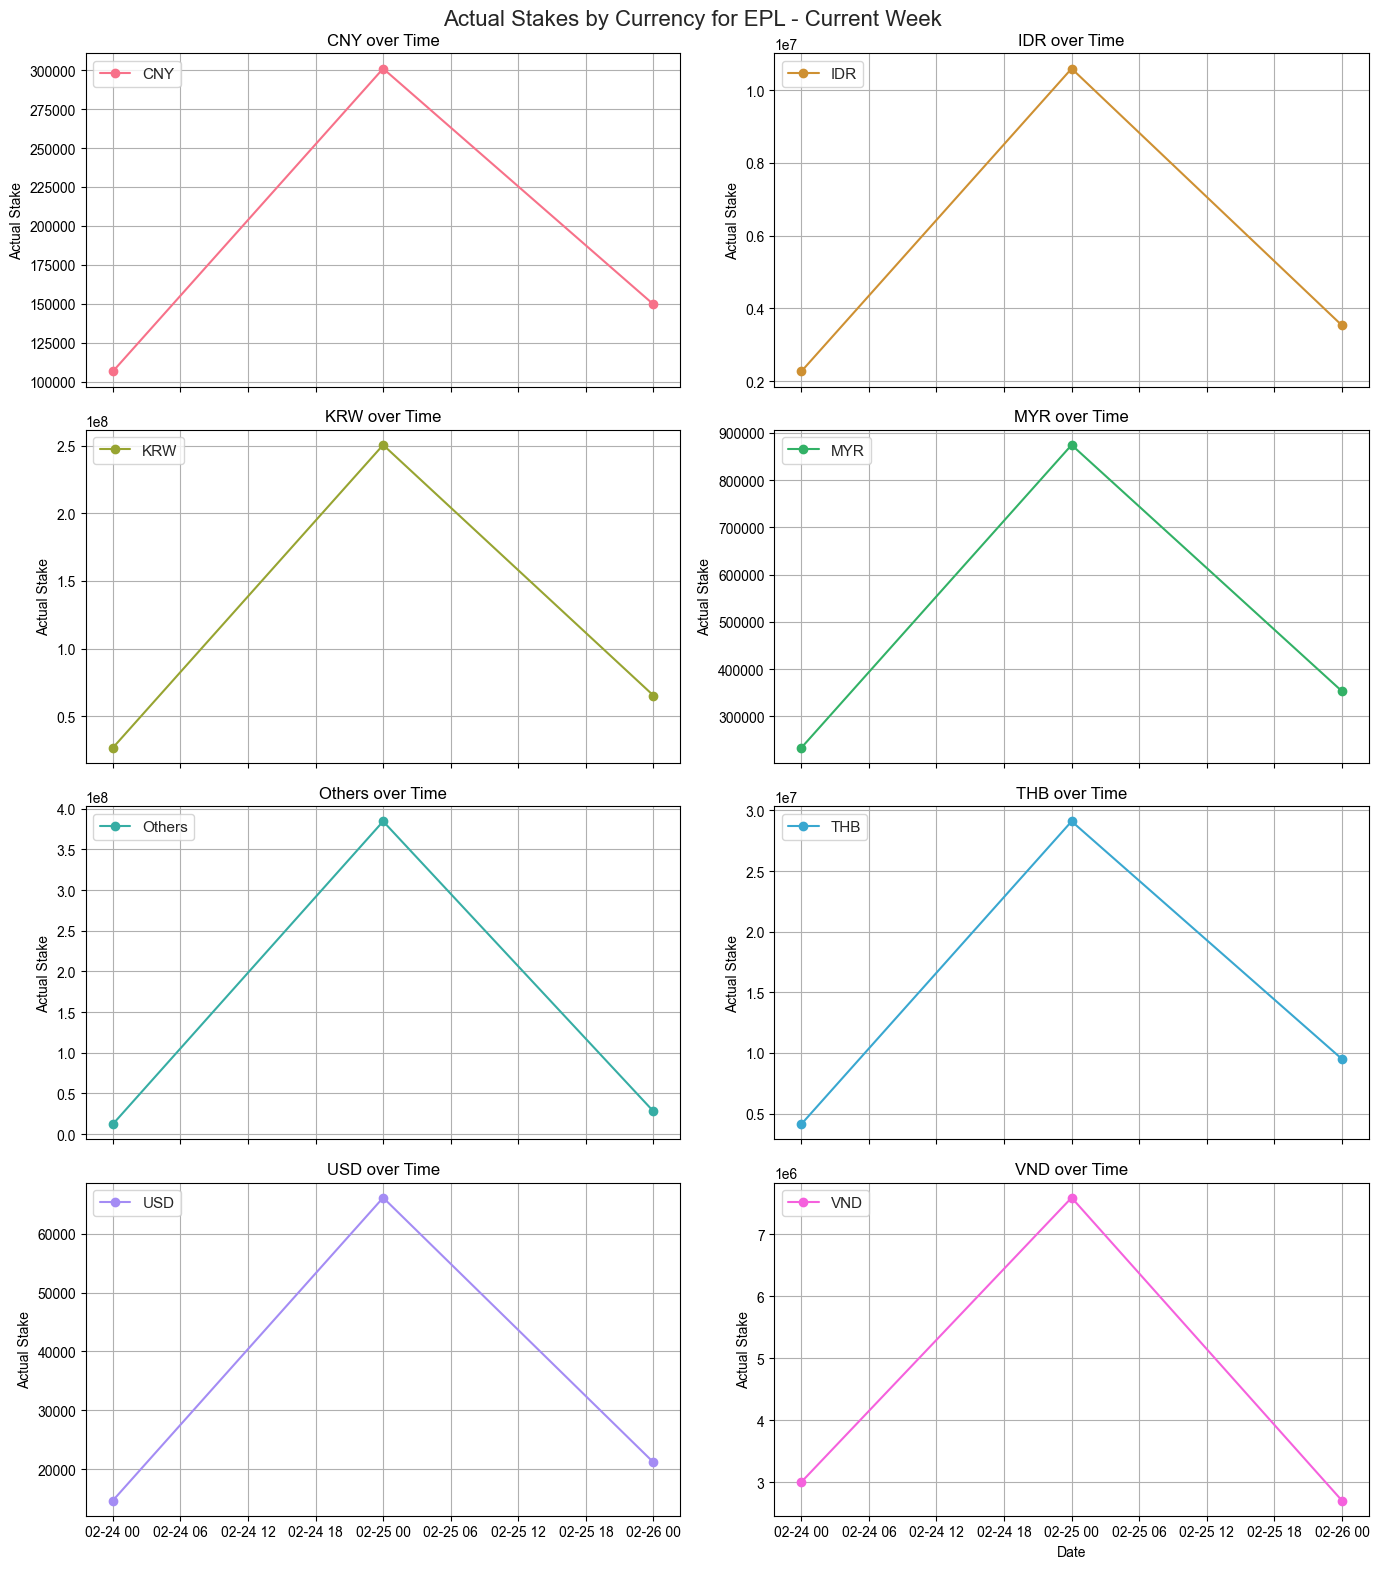

In [321]:
# Data for current week
stake_by_date_OldWeek = {
    '24/2/2023': english_premier_league_stake_by_date.iloc[:, 0].to_dict(),
    '25/2/2023': english_premier_league_stake_by_date.iloc[:, 1].to_dict(),
    '26/2/2023': english_premier_league_stake_by_date.iloc[:, 2].to_dict(),
}
# Convert to DataFrame and plot
df_current_week = convert_stakes_to_df(stake_by_date_OldWeek)
plot_stakes_by_currency(df_current_week, 'Actual Stakes by Currency for EPL - Current Week')

This graph illustrates the actual stakes by currency for the EPL across the dates of 24th, 25th, and 26th February 2023. The goal is to observe the distribution of stakes for each currency during these specific dates.

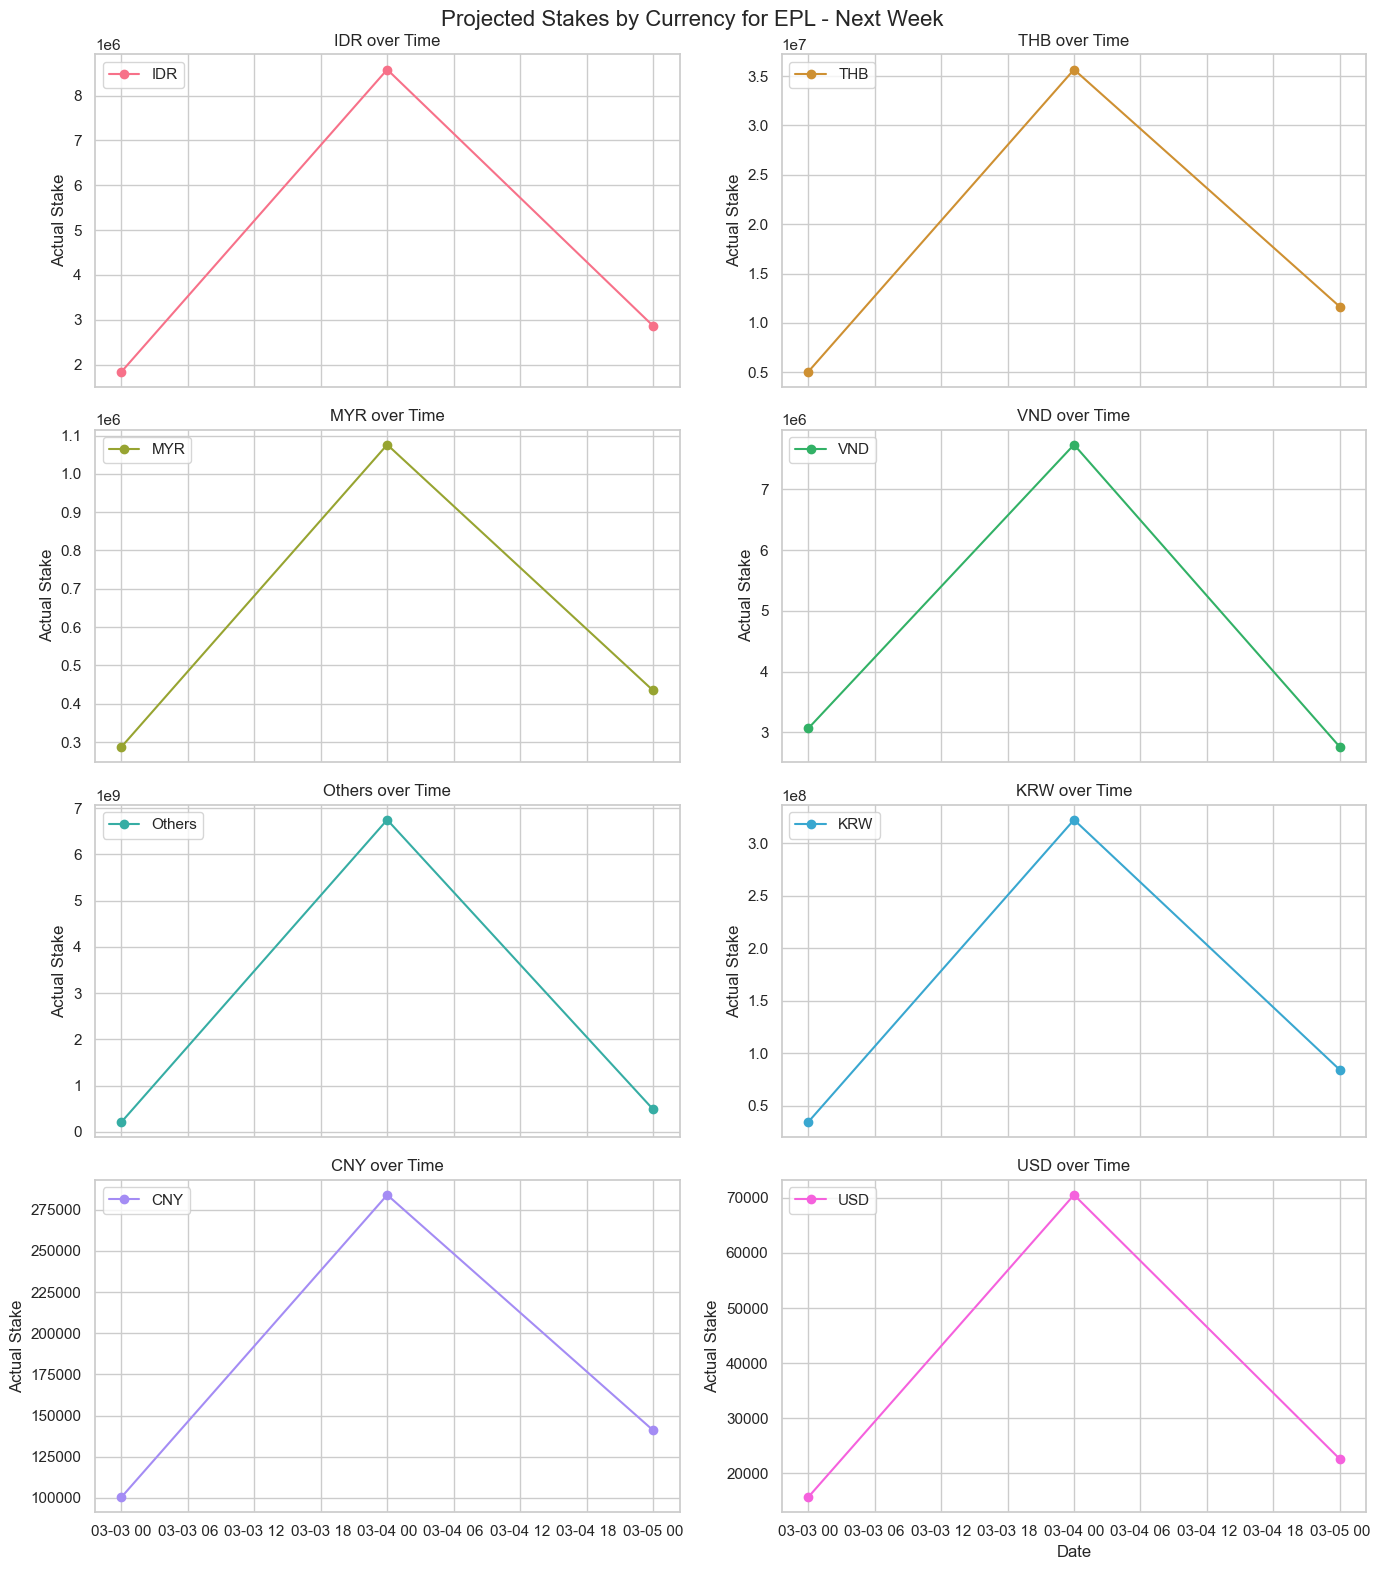

In [322]:
# Data for next week
# Convert to DataFrame and plot
df_next_week = convert_stakes_to_df(stake_by_date_NewWeek)
plot_stakes_by_currency(df_next_week, 'Projected Stakes by Currency for EPL - Next Week')

This graph projects the actual stakes by currency for the EPL for the dates of 3rd, 4th, and 5th March 2023. The objective here is to compare these stakes with the current week’s data to identify any significant shifts or patterns.

### 4. Assumptions and Implementation for Enhancing Betting Behavior Analysis  
**Assumptions**  
Frequent bettors are generally more engaged with the game, and over time, they tend to wager larger amounts due to increased confidence in their strategies. This habitual behavior suggests that the frequency of bets is a key factor influencing the total stakes placed by a player.

**Explanation**  
To improve our understanding of betting patterns and enhance the Actual Stake of a player, we must consider the frequency of bets. Two key parameters from the dataset aid in identifying these patterns based on timing:

In [369]:
# Count the total number of bets
total_bets = data.shape[0]

# Count the number of bets placed before the match
before_match_bets = data[data['LiveIndicator'] == 0].shape[0]

# Count the number of bets placed during the match
during_match_bets = data[data['LiveIndicator'] == 1].shape[0]

# Calculate the percentage of bets placed before and during the match
before_match_percentage = (before_match_bets / total_bets) * 100
during_match_percentage = (during_match_bets / total_bets) * 100

# Print the calculated percentages
print(f"Percentage of bets placed before the match: {before_match_percentage:.2f}%")
print(f"Percentage of bets placed during the match: {during_match_percentage:.2f}%")

Percentage of bets placed before the match: 31.24%
Percentage of bets placed during the match: 68.76%


Live Indicator: This parameter indicates whether a bet is placed before or during the match. Analysis reveals that a significant majority, 68.76%, of players place their bets during the match, while 31.24% place bets before the game starts.

TransactionDate: This parameter captures the exact time when a bet is placed. By analyzing TransactionDate for players who bet during the match, we can determine the stages of the game with the highest betting volumes.

#### Implementation
Using the Live Indicator, we can filter bets placed during the match. To further refine our analysis, we propose segmenting the game into 10-minute intervals based on TransactionDate. This segmentation will enable us to pinpoint the exact stages of the match with peak betting activity.

By focusing on these high-activity intervals, we can develop targeted strategies to engage players more effectively. For instance, offering incentives or bonuses during these peak periods can encourage continued betting. Additionally, understanding less active periods can help in designing strategies to boost engagement and balance the betting activity throughout the match.